# CPS 840 / CP 8318
# Assignment 1 - Alessandro Profenna - 500564824
## Part 1 [20 Marks]

[6 Marks] 
# a

Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values.


In [66]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


Coefficients before training: [0.0, 1.0]
Coefficients after training: [152.92683298537716, 933.8211410417586]
Mean squared error: 2553.34
Variance score: 0.47


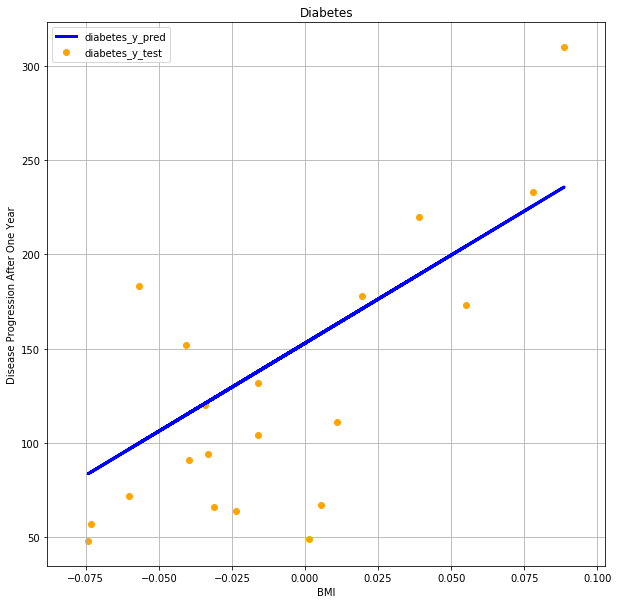

In [67]:
import matplotlib.pyplot as plt

#Implementation of a simple Linear Regression Model that 
#uses batch gradient descent to update weights incrementally
#Parameters:
#   threshold - threshold of the cost derivative, stops updating the weights once passed
#   learning_rate - rate of incremntal updates of gradient descent
#   training_data - sample feature data used to train the model
#   training_targets - sammple target data used to train the model (what the model tries to fit)
class Incremental_Linear_Regression:
    def __init__(self, threshold, learning_rate, training_data, training_targets):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.training_data = training_data
        self.training_targets = training_targets
        self.default_weight = 1.0
        self.trained_weights = self.initialize_weights()
    
    #Initialized weights are 0 for the bias and 1 for all features
    def initialize_weights(self):
        weights = []
        weights.append(0.0)
        weights += [self.default_weight] * len(self.training_data[0])
        return weights   
        
    def get_mean_squared_error(self, input_data, targets):
        predictions = self.predict_targets(input_data)
        return mean_squared_error(targets, predictions)
    
    def get_cost_derivative(self, weight_index, predictions):
        cost_derivative = 1/(len(predictions)); error_sum = 0
        for i in range(0, len(predictions)):
            data_val = 1.0
            if(weight_index - 1 >= 0):
                data_val = self.training_data[i][weight_index-1]
            error_sum += ((predictions[i] - self.training_targets[i])*data_val)
        return cost_derivative * error_sum
   
    
    def predict_targets(self, input_data):
        targets = []
        for i in range(0, len(input_data)):
            targets.append(self.trained_weights[0]) #adds the bias b0
            for j in range(1, len(self.trained_weights)):
                targets[i] += (input_data[i][j-1] * self.trained_weights[j])
        return targets
    
    
    def train_model(self):
        #using batch gradient descent to adjust weights, stops once threshold is reached
        successes = 0
        while(successes < len(self.trained_weights)):
            predictions = self.predict_targets(self.training_data)
            weights = self.trained_weights
            successes = 0
            for i in range(0, len(weights)):
                cost_derivative = self.get_cost_derivative(i, predictions)
                if(abs(cost_derivative) < self.threshold):
                    successes += 1
                else:
                    self.update_weight(i, cost_derivative)
            
        
    def update_weight(self, weight_index, cost_derivative):      
        new_weight = self.trained_weights[weight_index] - self.learning_rate*cost_derivative
        self.trained_weights[weight_index] = new_weight
    

#Creates an Incremental Linear Regression model instance with a learning rate of 0.5
#and threshold of 0.01 for the cost derivative.
#This model will be used to train sample data of diabetic patients to predict 
#the progression of the disease after one year using BMI as a feature
model = Incremental_Linear_Regression(0.01, 0.5, diabetes_X_train, diabetes_y_train)

# The coefficients (weights) before training
print('Coefficients before training:', model.trained_weights)

#Train the model using the training data
model.train_model()

#Make predictions for the test data using the trained model
diabetes_y_pred = model.predict_targets(diabetes_X_test)

# The coefficients (weights) after training
print('Coefficients after training:', model.trained_weights)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Variance Score
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

#This plot displays the BMI (single feature) vs. Disease Progression After One Year (target) of diabetic patients
#The test target data is plotted using a red scatter plot
#The predicted target data (best fit based on the trained Linear Regression model) is plotted with a blue line
plt.figure(figsize=(10,10))
plt.scatter(diabetes_X_test, diabetes_y_test, color="orange", label="diabetes_y_test")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3, label="diabetes_y_pred")

plt.grid(True)
plt.xlabel("BMI")
plt.ylabel("Disease Progression After One Year")
plt.title("Diabetes")
plt.legend(loc='best')
plt.show()



[2 Marks]
# b

Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and validation. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.

Explanation:

The data is split after part c because it first needs to be preprocessed and cleaned up. Afterwards, 80% of the remaining samples are split off to be used for training and the last 20% are used for testing. More data is used for training than testing to create a more accurate model.


In [68]:
### An example to load a csv file
import pandas as pd 
import numpy as np
from ast import literal_eval
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False)
#ratings_small=pd.read_csv('ratings_small.csv')
import warnings; warnings.simplefilter('ignore')

##### MY CODE HERE: #######

#ratings = pd.read_csv('ratings.csv')
#ratings_small = pd.read_csv('ratings_small.csv')
#credits = pd.read_csv('credits.csv')
#keywords = pd.read_csv('keywords.csv')
#links_small = pd.read_csv('links_small.csv')
#links = pd.read_csv('links.csv')

[5 Marks]
# c

Organize the data into relevant features for predicting revenue. <br>
<b>i.  Explain your feature sets and organization.</b> <br>

Using domain knowledge and a bit of common sense, these are the features I have chosen as useful for <br>
predicting movie revenue. They all came from the meta_data dataframe. I also used a heat map that shows correlations between features, and noticed that <br>
budget and vote count are highly indicative features of predicting revenue. <br><br>

Chosen features: <br>
original language, runtime, budget, month, genre, vote count, vote average, popularity <br><br>
NOTE: <br> 
Features such as original language and genre were hot encoded as additional binary-valued features <br>
Movie samples with unrealistic data were removed. These removed samples included 0s or strings in features where such data wouldn't make sense, or NaNs/nulls. <br>

Number of features before preprocessing:  23 <br>
Number of samples before preprocessing:  45466 

Number of features after preprocessing:  130 <br>
Number of samples after preprocessing:  5369 


<b>ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings.</b> <br>

The correlation between movie revenue and rating (vote average) isn't too strong since most points on the plot are clustered close to the bottom of the graph. The correlation value on the heat map is very low at 0.084. However, there is a noticeable increase of revenue with an increase in rating for a few samples.

<b>iii. Visualize any other relationships you deem interesting and explain.</b> <br>

I have also plotted the relationships of budget, vote count, and popularity with revenue to show that they each have a better correlation with it than rating (vote average).


Number of features before preprocessing:  23
Number of samples before preprocessing:  45466 

Number of features after preprocessing:  130
Number of samples after preprocessing:  5369 



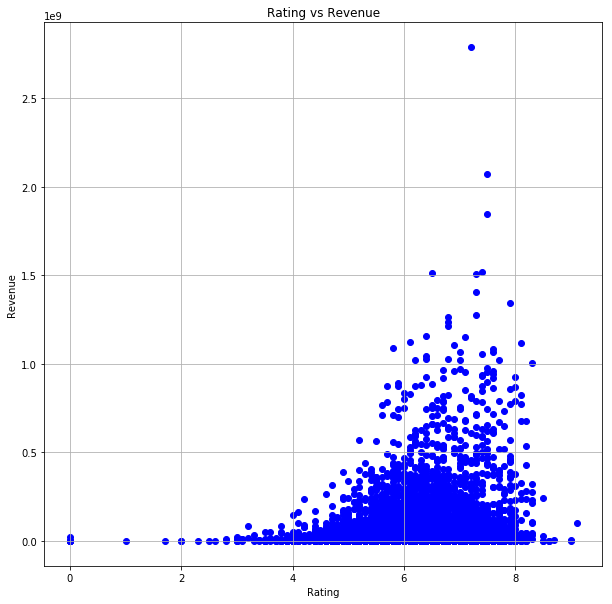

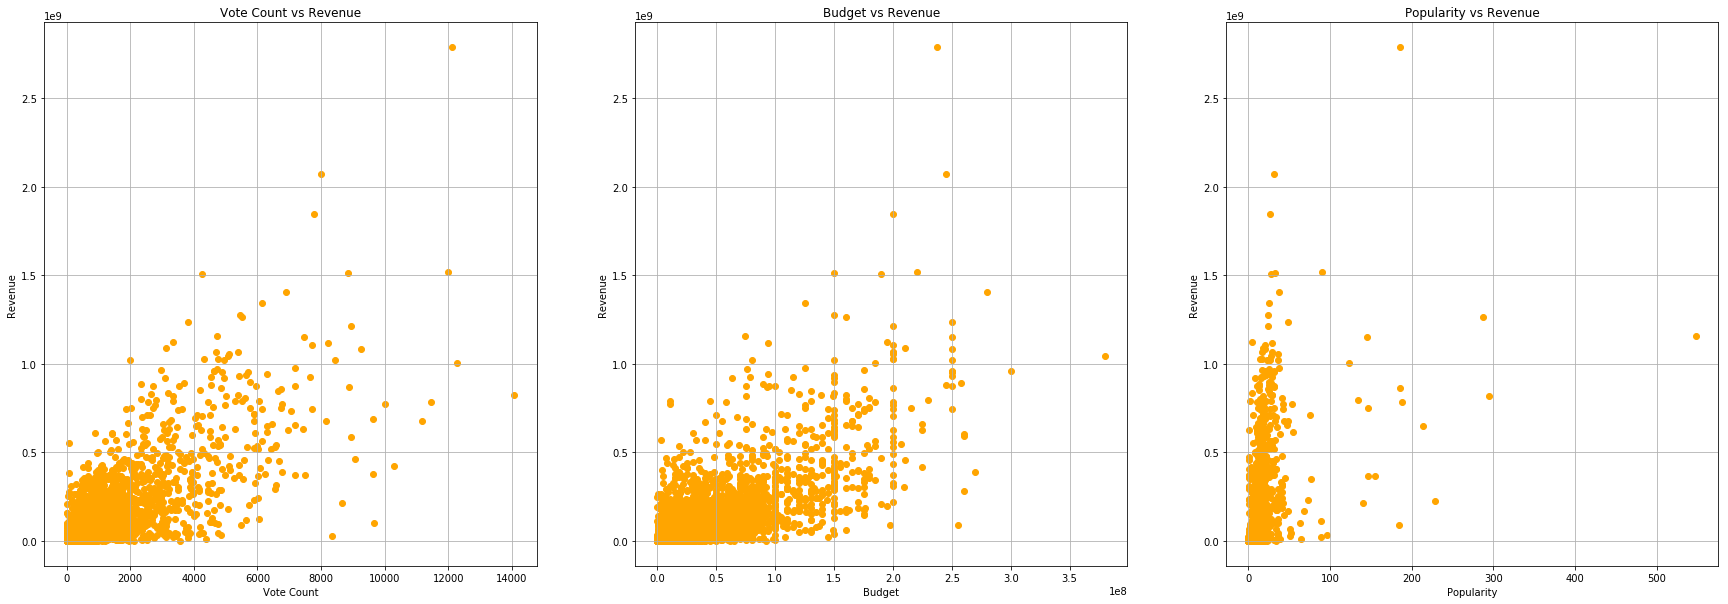

Movie Target Training set length: 4295
Movie Data Training set length: 4295
Movie Target Testing set length: 1074
Movie Data Tesing set lengtht: 1074


In [69]:
# The following line is one way of cleaning up the genres field - there are more verbose ways of doing this that are easier for a human to read
#meta_data['genres'] = meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#meta_data['year'] = pd.to_datetime(meta_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
# Consider how to columns look before and after this 'clean-up' - it is very common to have to massage the data to get the right features

##### MY CODE HERE: #######

from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns

#The data in the given dataframes needs to be cleaned up by removing garbage sample data and using only columns that store relevant features
#To do this, a copy of the meta_data dataframe will be created and will be revised/edited to store the preprocessed data

#Preprocessed data dataframe
preprocessed_data = meta_data.copy()

print('Number of features before preprocessing: ', preprocessed_data.shape[1] - 1)
print('Number of samples before preprocessing: ', preprocessed_data.shape[0], '\n')

#---(STEP 1) Cleanup of existing columns and creation of new ones---#

#Cleanup on 'release_date' to extract the 'month' and add it as a new column
preprocessed_data['month'] = pd.to_datetime(preprocessed_data['release_date'], errors='coerce').dt.month
preprocessed_data['month'] = preprocessed_data['month'].dropna().astype(int)

#Cleanup on 'genres' to hot encode each genre and add them as new binary-valued columns
preprocessed_data['genres'] = preprocessed_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: ["genre_" + i['name'] for i in x] if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
s = preprocessed_data['genres']
genres = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=preprocessed_data.index)
preprocessed_data = preprocessed_data.join(genres)

#Cleanup on 'original language' to hot encode each lanuage and add them as new binary-valued columns
preprocessed_data = pd.get_dummies(preprocessed_data, prefix=['lang_'], columns=['original_language'])

#---(STEP 2) Removal of irrelevant feature columns---#

preprocessed_data = preprocessed_data.drop(['adult', 'belongs_to_collection', 'genres', 'homepage', 'id', 'imdb_id'], axis=1)
preprocessed_data = preprocessed_data.drop(['original_title', 'overview', 'poster_path', 'production_companies'], axis=1)
preprocessed_data = preprocessed_data.drop(['production_countries', 'release_date', 'spoken_languages', 'status'], axis=1)
preprocessed_data = preprocessed_data.drop(['tagline', 'title', 'video'], axis=1)

#---(STEP 3) Removal of garbage sample data---#

#Conversion of some columns to numeric types to remove invalid data (such as random strings in the budget column)
df1=pd.to_numeric(preprocessed_data['budget'],errors='coerce').dropna()
df2=pd.to_numeric(preprocessed_data['popularity'],errors='coerce').dropna()
preprocessed_data = preprocessed_data.drop(['budget', 'popularity'], axis=1)
preprocessed_data = preprocessed_data.join(df1)
preprocessed_data = preprocessed_data.join(df2)

#Removal of samples with the value 0 for features where 0 wouln't make sense
preprocessed_data = preprocessed_data.drop(preprocessed_data[preprocessed_data.runtime == 0].index)
preprocessed_data = preprocessed_data.drop(preprocessed_data[preprocessed_data.budget == 0].index)
preprocessed_data = preprocessed_data.drop(preprocessed_data[preprocessed_data.popularity == 0].index)
preprocessed_data = preprocessed_data.drop(preprocessed_data[preprocessed_data.revenue == 0].index)
preprocessed_data = preprocessed_data.dropna()
print('Number of features after preprocessing: ', preprocessed_data.shape[1] - 1)
print('Number of samples after preprocessing: ', preprocessed_data.shape[0], '\n')

#---(STEP 4) Creating a scatterplot to see movie rating (vote_average) vs. revenue---#


plt.figure(figsize=(10,10))
plt.scatter(preprocessed_data.vote_average.values, preprocessed_data.revenue.values, color='blue')
plt.grid(True)
plt.xlabel("Rating")
plt.ylabel("Revenue")
plt.title("Rating vs Revenue")

plt.figure(figsize=(30,10))
plt.subplot(131)
plt.scatter(preprocessed_data.vote_count.values, preprocessed_data.revenue.values, color='orange')
plt.grid(True)
plt.xlabel("Vote Count")
plt.ylabel("Revenue")
plt.title("Vote Count vs Revenue")

plt.subplot(132)
plt.scatter(preprocessed_data.budget.values, preprocessed_data.revenue.values, color='orange')
plt.grid(True)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Revenue")

plt.subplot(133)
plt.scatter(preprocessed_data.popularity.values, preprocessed_data.revenue.values, color='orange')
plt.grid(True)
plt.xlabel("Popularity")
plt.ylabel("Revenue")
plt.title("Popularity vs Revenue")
plt.show()

#---(STEP 5) Moving the 'revenue' column from preprocessed_data to make it the target data set---#

target = pd.DataFrame()
target['revenue'] = preprocessed_data['revenue']
preprocessed_data = preprocessed_data.drop("revenue",axis=1)

#---(STEP 6) Splitting the preprocessed_data and target dataframes into training and testing sets---#

movie_data_train = preprocessed_data[:math.floor(len(preprocessed_data)*0.8)]
movie_data_test = preprocessed_data[math.floor(len(preprocessed_data)*0.8):]
movie_target_train = target[:math.floor(len(target)*0.8)]
movie_target_test = target[math.floor(len(target)*0.8):]

####
print("Movie Target Training set length: " + str(len(movie_target_train)))
print("Movie Data Training set length: " + str(len(movie_data_train)))
print("Movie Target Testing set length: " + str(len(movie_target_test)))
print("Movie Data Tesing set lengtht: " + str(len(movie_data_test)))




[3 Marks]
# d

Train a regression model to predict movie revenue. Plot predicted revenue vs. actual revenue on the test set. Quantify the error in your prediction. (You may use sklearn for this step)

Mean squared error: 11257799803473844.00
Variance score: 0.75


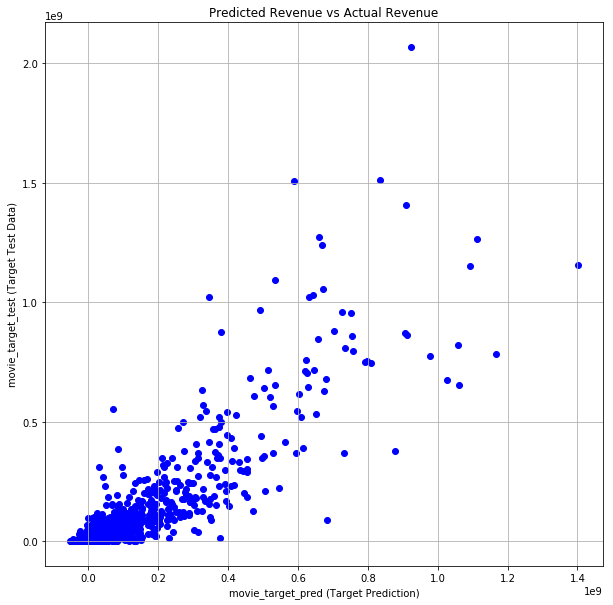

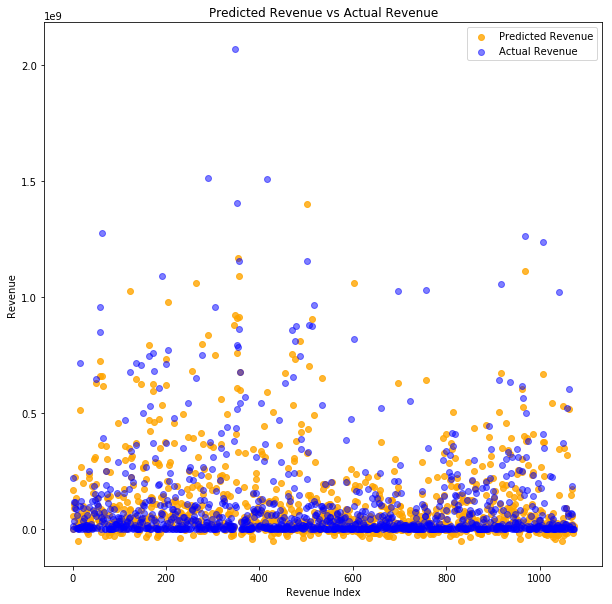

In [70]:
# Regression model here, plot your fit to the revenue data versus the actual data from the test set as a scatter plot.

##### YOUR CODE HERE #######
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
#Uses 114 input features to predict revenue
regr.fit(movie_data_train, movie_target_train)

# Make predictions using the testing set
movie_target_pred = regr.predict(movie_data_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(movie_target_test, movie_target_pred))

# variance score
print('Variance score: %.2f' % r2_score(movie_target_test, movie_target_pred))

plt.figure(figsize=(10,10))
plt.scatter(movie_target_pred, movie_target_test.revenue.values,  color='blue')
plt.grid(True)
plt.xlabel("movie_target_pred (Target Prediction)")
plt.ylabel("movie_target_test (Target Test Data)")
plt.title("Predicted Revenue vs Actual Revenue")
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(range(len(movie_target_pred)),movie_target_pred, color='orange',alpha=0.8, label='Predicted Revenue')
plt.scatter(range(len(movie_target_pred)),movie_target_test.revenue.values, color='blue',alpha=0.5, label='Actual Revenue')
plt.xlabel("Revenue Index")
plt.ylabel("Revenue")
plt.title("Predicted Revenue vs Actual Revenue")
plt.legend(loc='best')
plt.show()

[4 Marks]
# e

Try a non-linear fit to the data, with and without regularization. Find your best fit and justify the choice of parameters, regularization constant and norm. Plot predicted revenue vs. actual revenue on the test set. In each case, quantify the error. (See e.g. Generalized linear models, Kernel Ridge regression, SVR and others from sklearn)


Mean squared error: 221064505823637792.00
Variance score: -3.98


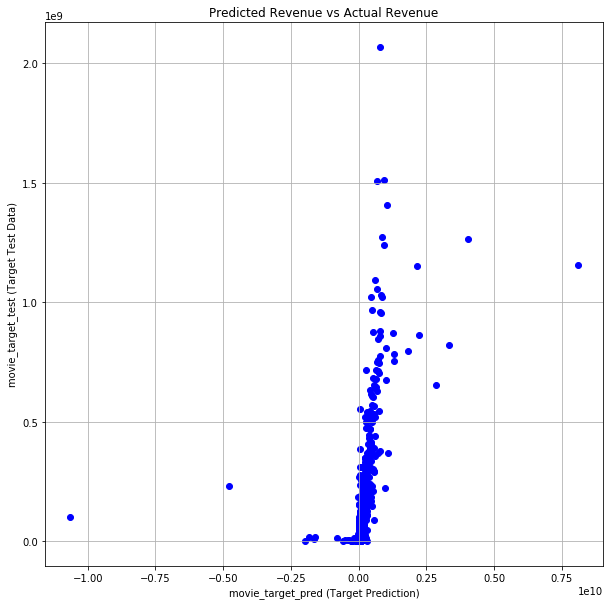

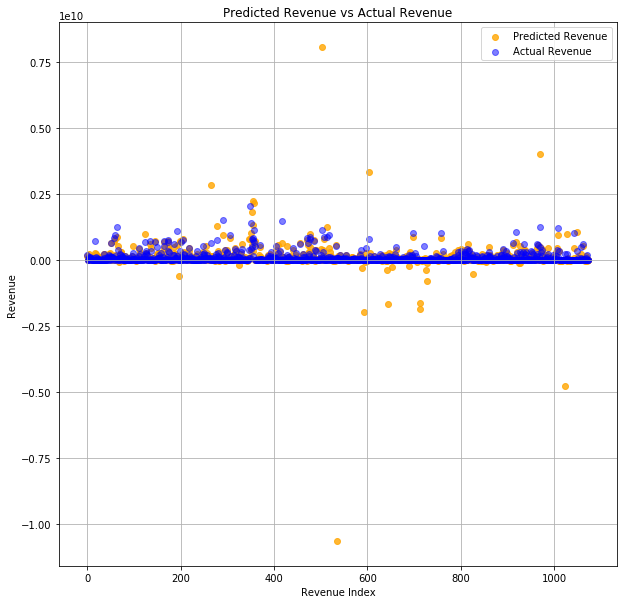

In [71]:
##### YOUR CODE HERE WITHOUT REGULARIZATION #######

#NOTE: This takes some time to run (likely less than 30 seconds)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import Ridge, LinearRegression

# Create linear regression object
regr = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                 ('linear', LinearRegression(fit_intercept=False))])

# Train the model using the training sets
#Uses 114 input features to predict revenue
regr = regr.fit(movie_data_train, movie_target_train)

# Make predictions using the testing set
# movie_target_pred = regr.predict(movie_data_test['popularity'][:,None])
movie_target_pred = regr.predict(movie_data_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(movie_target_test, movie_target_pred))

# variance score
print('Variance score: %.2f' % r2_score(movie_target_test, movie_target_pred))

plt.figure(figsize=(10,10))
plt.scatter(movie_target_pred, movie_target_test.revenue.values,  color='blue')
plt.grid(True)
plt.xlabel("movie_target_pred (Target Prediction)")
plt.ylabel("movie_target_test (Target Test Data)")
plt.title("Predicted Revenue vs Actual Revenue")
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(range(len(movie_target_pred)),movie_target_pred, color='orange',alpha=0.8, label='Predicted Revenue')
plt.scatter(range(len(movie_target_pred)),movie_target_test.revenue.values, color='blue',alpha=0.5, label='Actual Revenue')
plt.grid(True)
plt.xlabel("Revenue Index")
plt.ylabel("Revenue")
plt.title("Predicted Revenue vs Actual Revenue")
plt.legend(loc='best')
plt.show()

Mean squared error: 10290637174035024.00
Variance score: 0.77


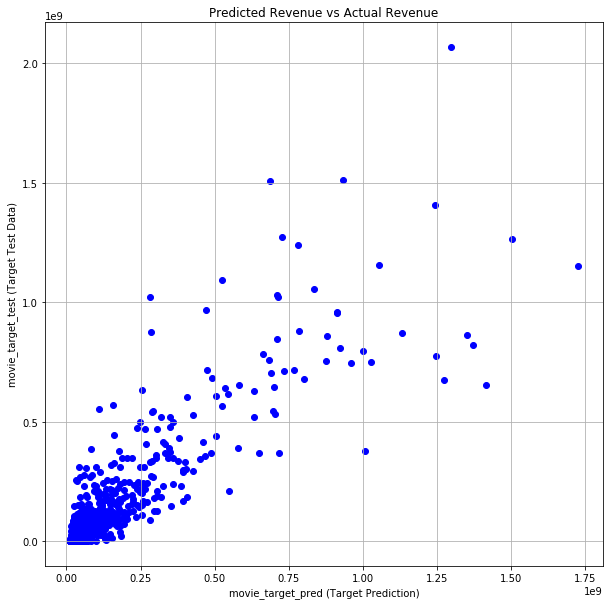

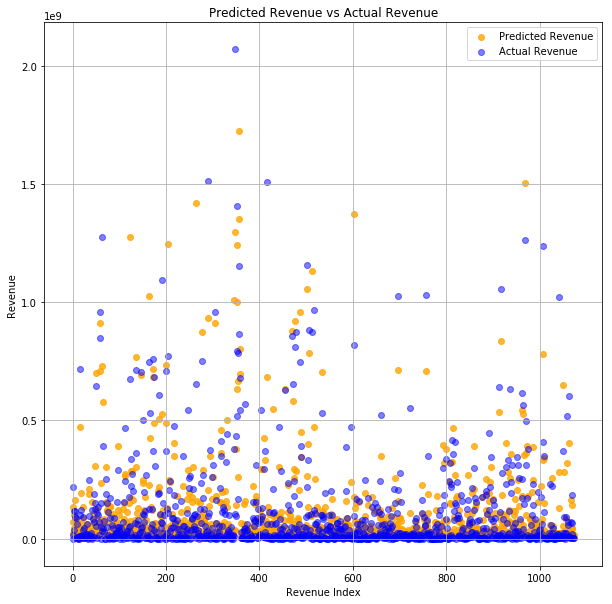

In [73]:
##### YOUR CODE HERE WITH REGULARIZATION #######

#NOTE: This takes some time to run (likely less than 30 seconds)

from sklearn.linear_model import Lasso

# Create linear regression object
degree = 2
lasso = make_pipeline(PolynomialFeatures(degree), Lasso(alpha = 100000000000000))

# Train the model using the training sets
#Uses 114 input features to predict revenue
lasso.fit(movie_data_train, movie_target_train)

# Make predictions using the testing set
movie_target_pred = lasso.predict(movie_data_test)

# # The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(movie_target_test, movie_target_pred))

# # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(movie_target_test, movie_target_pred))


plt.figure(figsize=(10,10))
plt.scatter(movie_target_pred, movie_target_test.revenue.values,  color='blue')
plt.grid(True)
plt.xlabel("movie_target_pred (Target Prediction)")
plt.ylabel("movie_target_test (Target Test Data)")
plt.title("Predicted Revenue vs Actual Revenue")
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(range(len(movie_target_pred)),movie_target_pred, color='orange',alpha=0.8, label='Predicted Revenue')
plt.scatter(range(len(movie_target_pred)),movie_target_test.revenue.values, color='blue',alpha=0.5, label='Actual Revenue')
plt.grid(True)
plt.xlabel("Revenue Index")
plt.ylabel("Revenue")
plt.title("Predicted Revenue vs Actual Revenue")
plt.legend(loc='best')
plt.show()

Explanation:

I used a non-linear regression model with a degree of 2 with and without regularization. Without regularization, the model became much worse with a variance of -5.09. With regularization, the model improved greatly, with a variance of 0.77, which is higher than the degree 1 linear regression model.

For regularization, I used L1 (Lasso) because it is better for models with many features, especially when many of the features may be useless. I added many features to my model through hot encoding, and expected many would be not be helpful and should therefore be given very small or a zero coefficient. These features would include many of the original languages and genres. The alpha value constant used is 100000000000000, which yielded the best variance score. I played around with smaller and larger degress of 10 and this seemed to be best.

## Part 2 [10 Marks]

[4 Marks]
# a

Write a simple version of the basic algorithm for k-means clustering. Simple here means the core of the algorithm and not optimizations or extensions you might find in standard python libraries. Typically you might rely on a standard library for doing this, but it helps to see the core by manipulating the data and labels by hand as practice for numerical python and how to frame the algorithm.

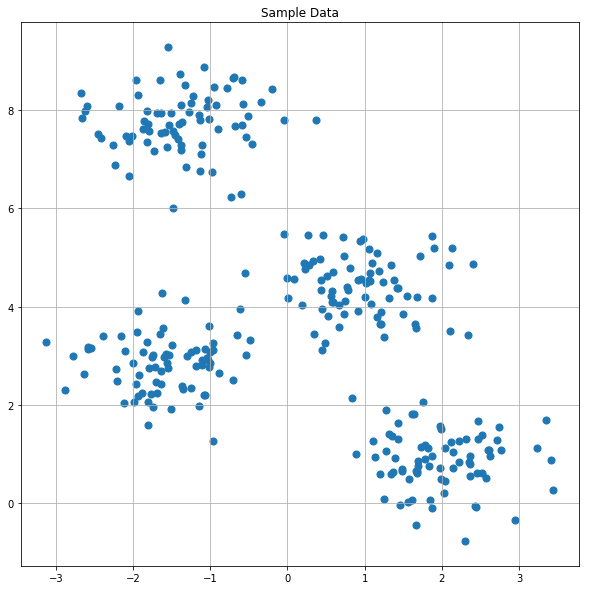

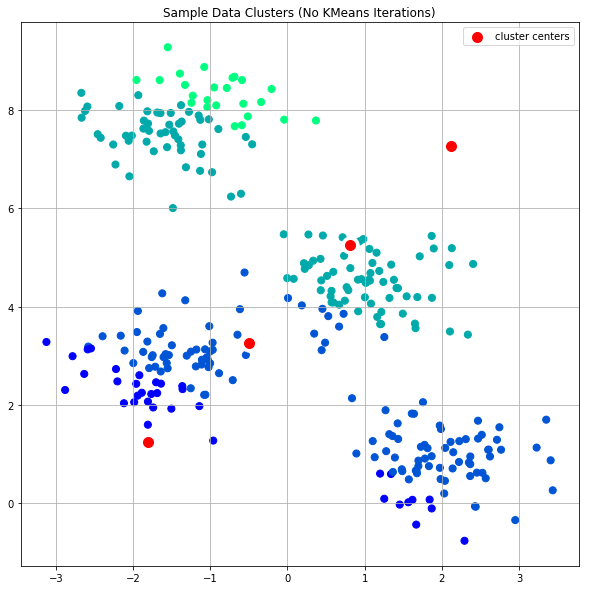

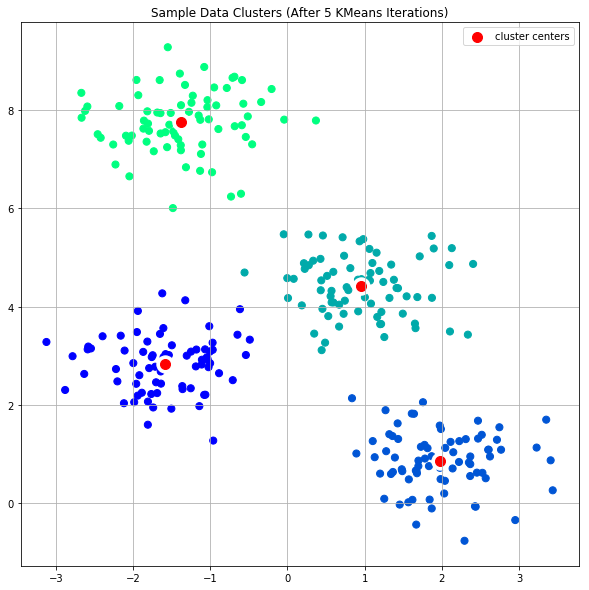

In [78]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; #sns.set()  # for plot styling
import numpy as np


# Generate Samples
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.grid(True)
plt.title("Sample Data")
plt.show()


###############################################
# YOUR CODE GOES HERE
# Put some code to find clusters here
# Assign the clusters and labels in your code
###############################################
import math
import random

#Implentation of a simple KMeans model for clustering
#Parameters:
#   X - Feature Data
#   iters - number of iterations
#   k - number of clusters
class KMeans:
    def __init__(self, X, iters, k):
        self.iters = iters
        self.k = k
        self.X = X
        self.cluster_centers = self.initialize_cluster_centers()
        #self.cluster_values = [1.0]*len(X)
        self.cluster_values = [0]*len(X)
        
        
    def euclidean_distance(self, vec1, vec2):
        if(len(vec1) != len(vec2)):
            print("Error: Vec1 and Vec2 must be equal in length.")
            return -1
        sum = 0.0
        for comp1, comp2 in zip(vec1, vec2):
            sum += (math.pow((comp2 - comp1),2))
        return math.sqrt(sum)
    
    
    def initialize_cluster_centers(self):
        #Get min and max value in each dimension
        bounds = []
        cluster_centers = []
        if(len(self.X > 0)):
            for i in range(0,len(self.X[0])):
                bounds += [[min(self.X[:, i]), max(self.X[:, i])]]
        
        #Evenly distribute arbitrary cluster centers within the bounding range of each dimension
        for i in range(0, self.k):
            cluster_center = []
            for j in range(0, len(bounds)):
                partition = (bounds[j][1] - bounds[j][0])/(self.k+1)
                cluster_center += [bounds[j][0] + (i+1)*partition]
            cluster_centers += [cluster_center]
        return cluster_centers
    
    def assign_clusters(self):
        for i in range(0, len(self.cluster_values)):
            closest_cluster = 0
            min_distance = self.euclidean_distance(self.X[i], self.cluster_centers[0])
            for j in range(1, self.k):
                distance = self.euclidean_distance(self.X[i], self.cluster_centers[j])
                if(distance < min_distance):
                    min_distance = distance
                    closest_cluster = j
                    #self.cluster_values[i] = 1/(j+1.0)
            self.cluster_values[i] = closest_cluster
                    
    def update_centers(self):
        size = len(self.X[0]) + 1
        averages = []
        for i in range(0, self.k):
            avg_cluster_values = []
            for j in range(0, size):
                avg_cluster_values.append(0.0)
            averages.append(avg_cluster_values)
        
        #Gather the component sums and counts of all samples in each cluster
        for i in range(0,len(self.X)):
            cluster_num = self.cluster_values[i]
            for j in range(0, len(self.X[i])):
                averages[cluster_num][j] += self.X[i][j]
            #Increase the count of the number of points in cluster_num
            count_index = len(averages[cluster_num])-1
            averages[cluster_num][count_index] += 1

        #Calculate the averages of each dimension of the samples in each cluster 
        #and assign the new cluster centers
        for i in range(0, len(averages)):
            count = averages[i][len(averages[i])-1]
            for j in range(0, len(self.X[i])):
                if (count <= 0): 
                    averages[i][j] = 0.0
                else: 
                    averages[i][j] = averages[i][j]/count
                self.cluster_centers[i][j] = averages[i][j]
            

    def run_kmeans(self):
        for i in range(0, self.iters): 
            self.assign_clusters()
            self.update_centers()
        self.assign_clusters()
        
        
    def plot_clusters(self):
        for i in range(0,len(self.X)):
            cluster = self.cluster_values[i]
            if(cluster == 0): 
                plt.scatter(self.X[i][0],self.X[i][1], color='black')
                
                
                
#Creates an instance of the above KMeans model with X as the input data, 0 iterations, and 4 clusters 
#This only initializes the cluster centers to default positions, and doesn't update them since there are
#no iterations of the kmeans algorithm performed
kmeans = KMeans(X, 0, 4)
#Runs the KMeans model
kmeans.run_kmeans()

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c=np.array(kmeans.cluster_values), cmap='winter');
plt.scatter(np.array(kmeans.cluster_centers)[:,0],np.array(kmeans.cluster_centers)[:,1], s=300, color='white')
plt.scatter(np.array(kmeans.cluster_centers)[:,0],np.array(kmeans.cluster_centers)[:,1], s=100, color='red', label='cluster centers')
plt.title("Sample Data Clusters (No KMeans Iterations)")
plt.legend(loc='best')
plt.grid(True)
plt.show()
        
#Creates an instance of the above KMeans model with X as the input data, 5 iterations, and 4 clusters 
#After this runs, the cluster centers will be updated to the actual centers of the sample data clusters
kmeans = KMeans(X, 5, 4)
#Runs the KMeans model
kmeans.run_kmeans()

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c=np.array(kmeans.cluster_values), cmap='winter');
plt.scatter(np.array(kmeans.cluster_centers)[:,0],np.array(kmeans.cluster_centers)[:,1], s=300, color='white')
plt.scatter(np.array(kmeans.cluster_centers)[:,0],np.array(kmeans.cluster_centers)[:,1], s=100, color='red', label='cluster centers')
plt.title("Sample Data Clusters (After 5 KMeans Iterations)")
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Uncomment to display clusters and cluster centers
#plt.scatter(X[:, 0], X[:, 1], c=labels,
#            s=50, cmap='viridis');
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<a id="data set"></a>
[6 Marks]
# b

Load the mystery data below, and cluster the data (you don't need to use your code from part a). Visualize the data including assigned cluster labels.

In [79]:
# Load the mystery data here and cluster using k-means (now you can use libraries e.g. sklearn)

from sklearn.cluster import KMeans
import pandas as pd 

mystery = np.load('mystery.npy')

mystery_data = pd.DataFrame(data=mystery,index=np.arange(0, mystery.shape[0]), columns=np.arange(0, mystery.shape[1]))

#Creates a KMeans instance that assigns the mystery data to 7 clusters 
#(The reason for picking k=7 is explained in the next part)
kmeans = KMeans(init='k-means++', n_clusters=7)
assigned_clusters = kmeans.fit_predict(mystery_data)


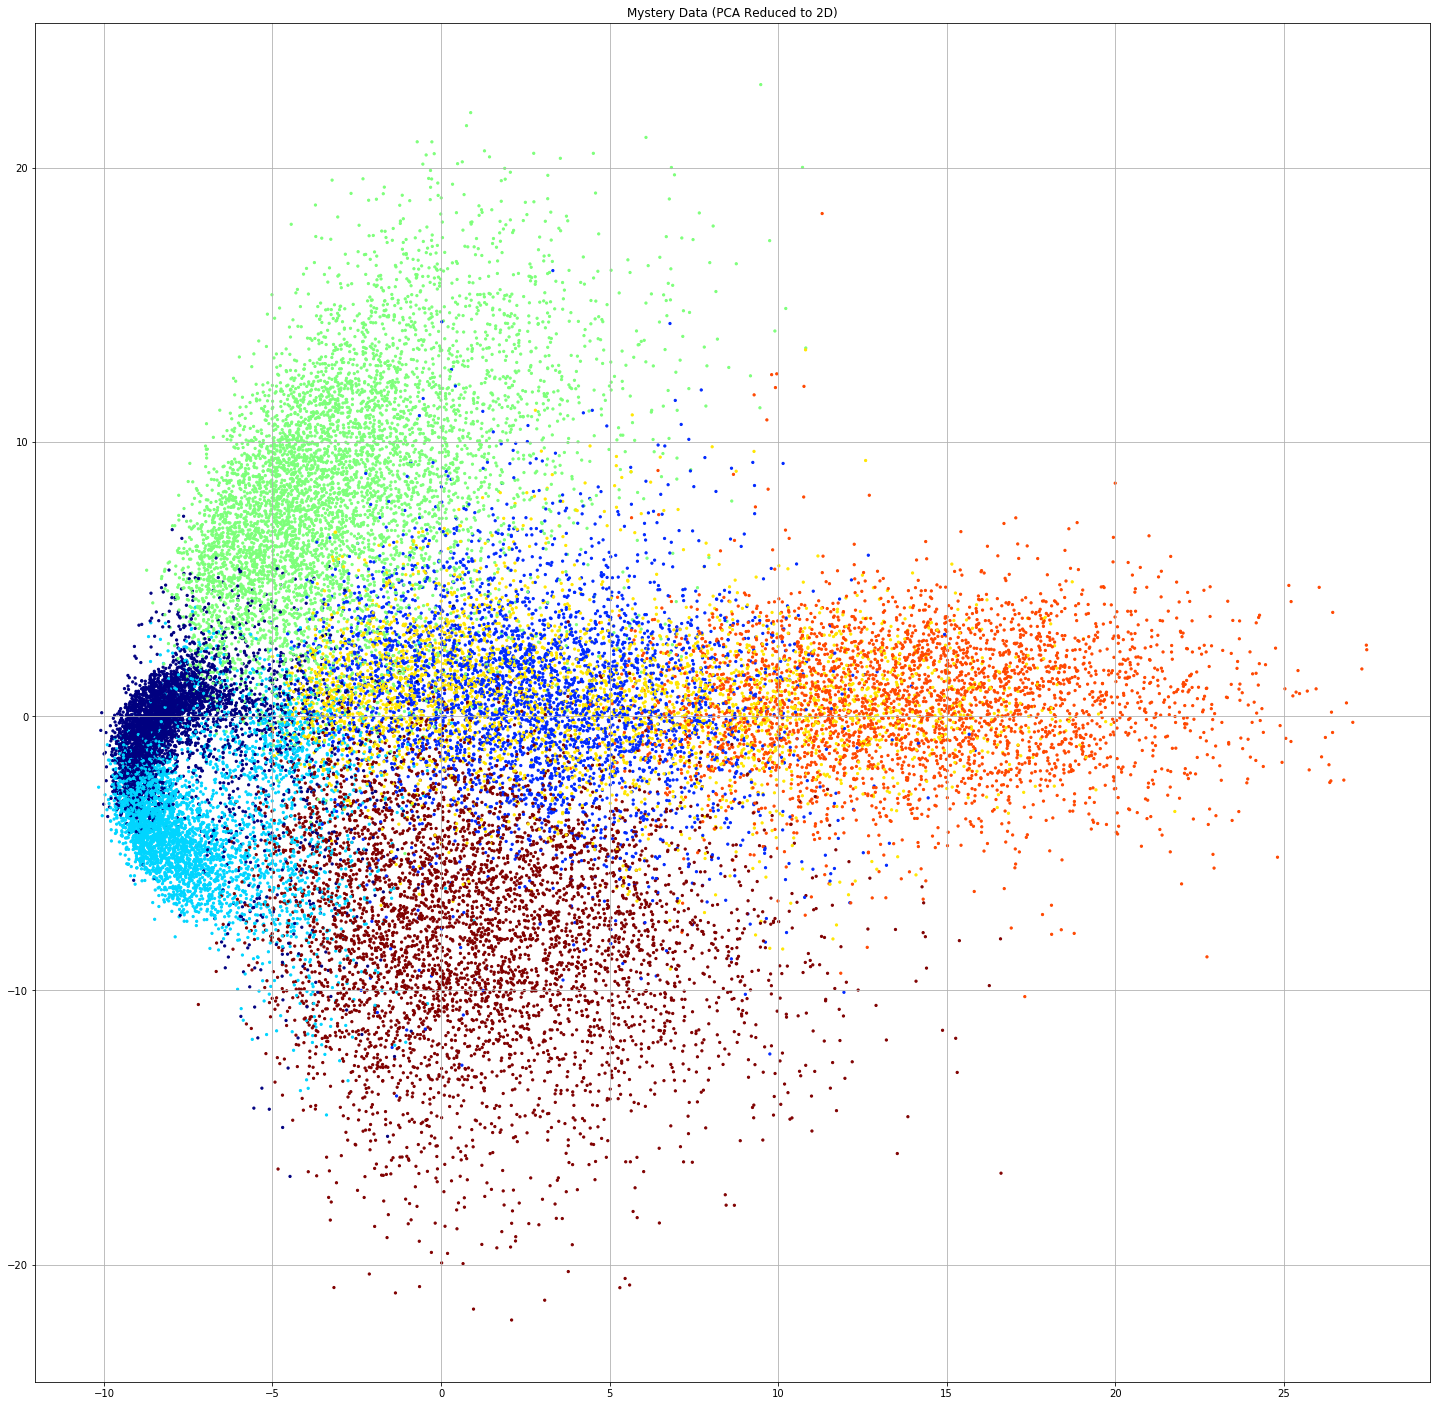

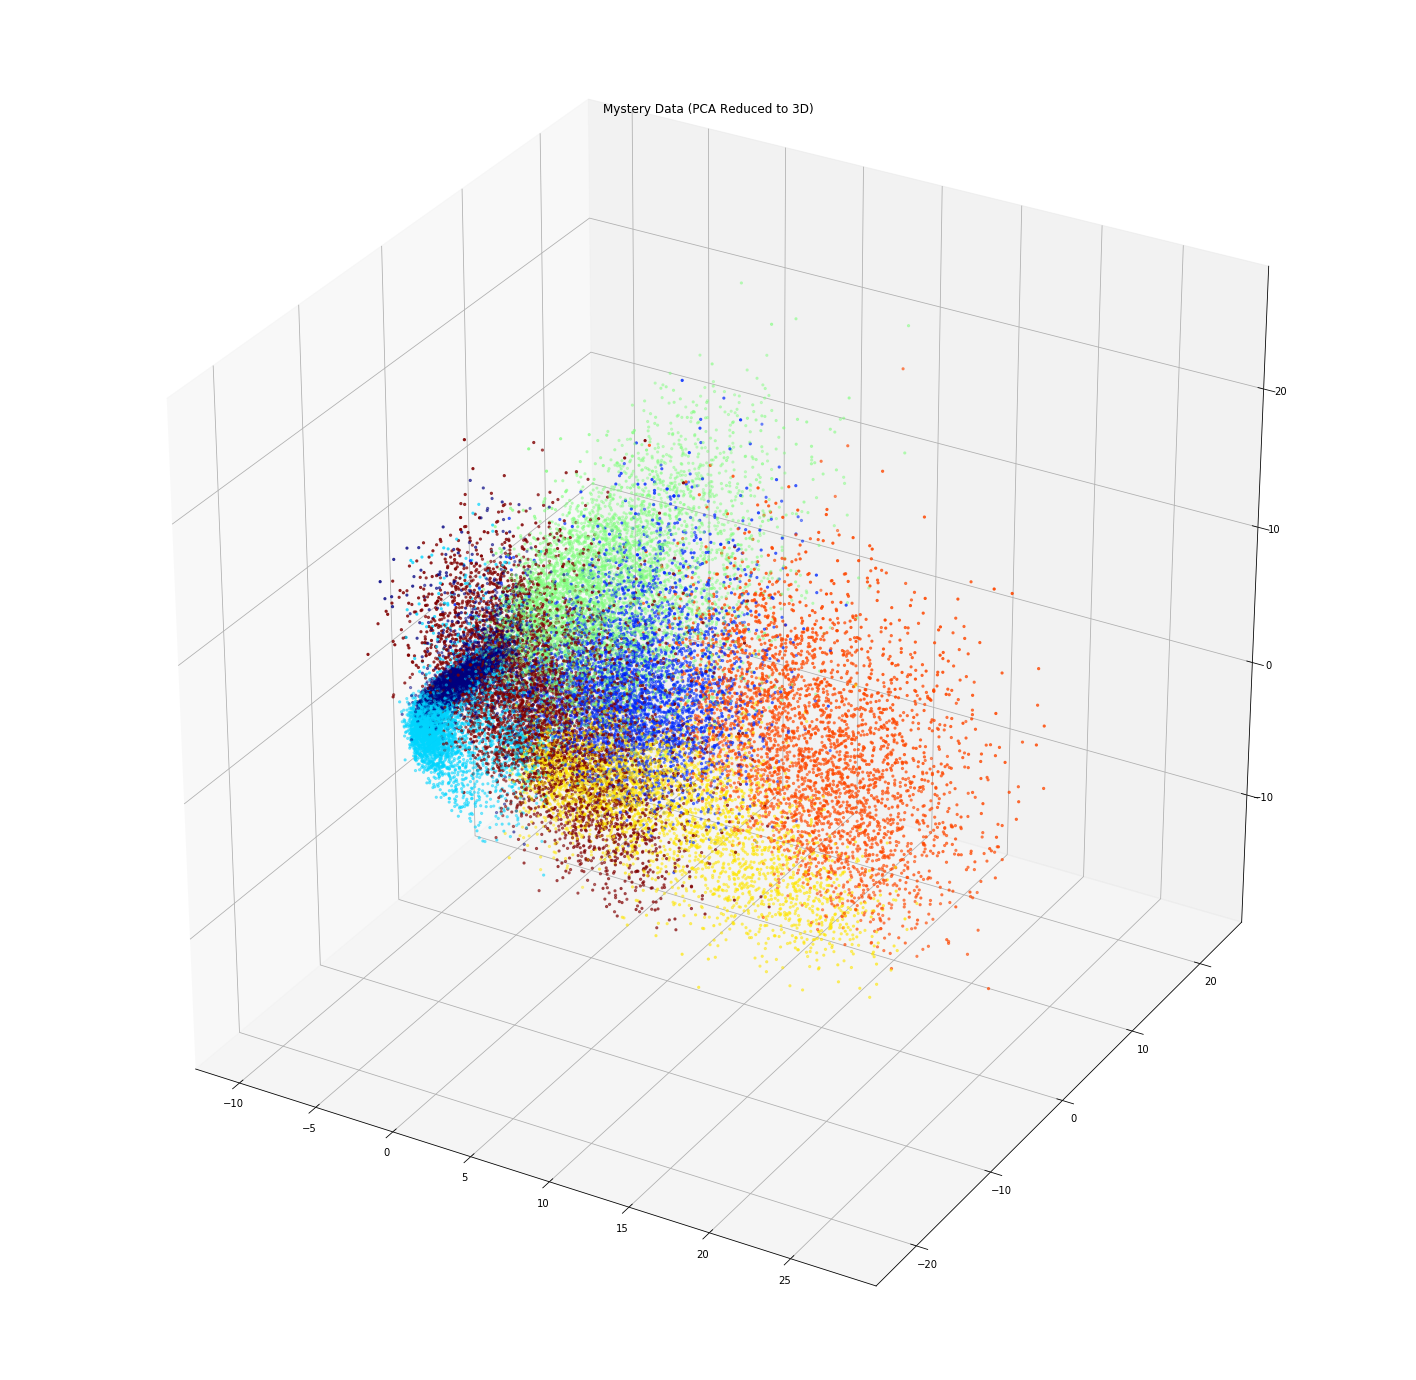

In [82]:
# Find a way to visualize the data (e.g. in 2D or 3D), color datapoints based on assigned labels.

from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

#This is done to preproccess the data for PCA
scaler = preprocessing.StandardScaler()
smd = scaler.fit_transform(mystery_data)
scaled_mystery_data = pd.DataFrame(data=smd,index=np.arange(0, smd.shape[0]), columns=np.arange(0, smd.shape[1]))

#Reduces the data is 2D for easy visualization
reduced_data_2D = PCA(n_components=2).fit_transform(scaled_mystery_data)
reduced_data_3D = PCA(n_components=3).fit_transform(scaled_mystery_data)

#Displays a scatterplot of the mystery data in 2D, with each sample coloured according to its assigned cluster
plt.figure(figsize=(25,25))
plt.title("Mystery Data (PCA Reduced to 2D)")
plt.grid(True)
plt.scatter(reduced_data_2D[:,0],reduced_data_2D[:,1] ,s=5, c=assigned_clusters, cmap='jet')

#Displays a scatterplot of the mystery data in 3D, with each sample coloured according to its assigned cluster
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111, projection='3d')
plt.title("Mystery Data (PCA Reduced to 3D)")
ax.scatter(reduced_data_3D[:,0],reduced_data_3D[:,1], reduced_data_3D[:,2] ,s=5, c=assigned_clusters, cmap='jet')
plt.show()

Based on the results above and any other analysis you wish to include, discuss how many clusters you see in the data.

To help with determining the optimal k number of clusters for the mystery data, I used the elbow method. This basically calculates the score for different kmeans models, each using a different k in the range from 1 to 25. Typically, the k value at the "elbow" of the curve is the best choice, in this case is seems to be between 5 and 10, so I chose k=7. This also somewhat verifiable by looking at the plots of the PCA reduced mystery data. For the 2D plot, there are obvious clusters that have been labeled precisely (such as the ones at the top and bottom on the plot) but there are some that look completely mixed. In the 3D plot, however, the 7 clusters seem more distinct and reasonable, without as much overlap. For example, the clusters on the right side of the 2D plot overlapped completely but are distinctly separate in the 3D plot.

(any additional code supporting your assertion on the number of clusters may be included below)

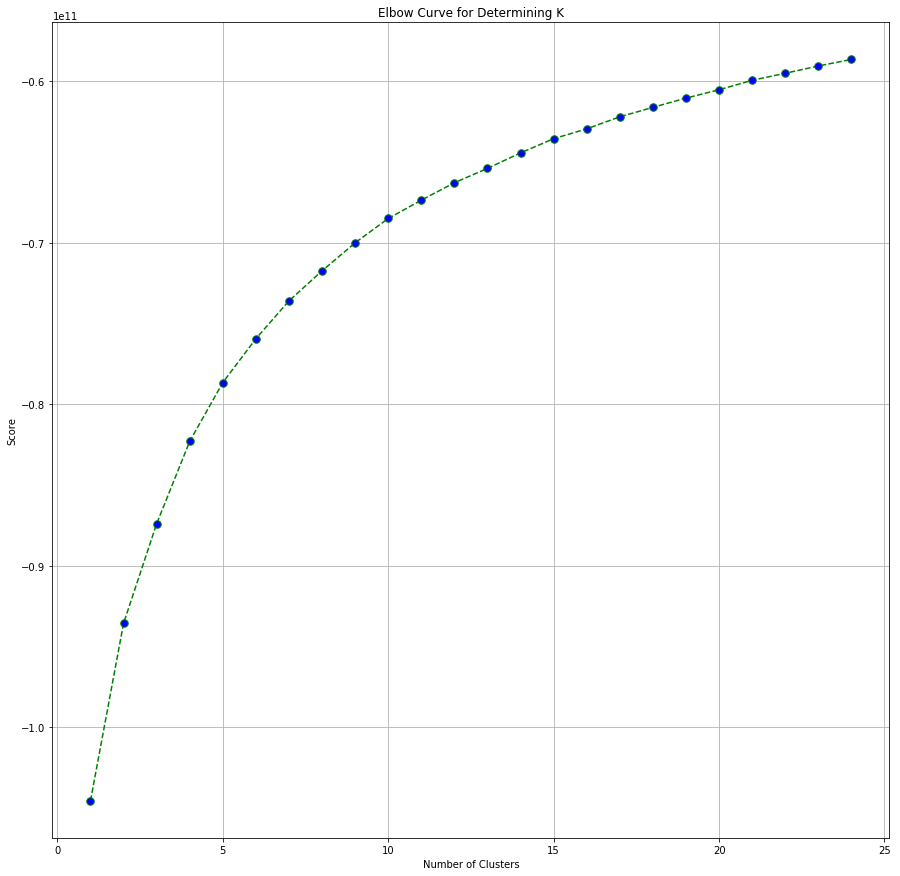

In [83]:

#NOTE: This takes a while to run (roughly 10 minutes)

# Here is the use of the elbow method to determine an optimal k value
possible_num_clusters = range(1, 25)
kmeans_array = [KMeans(n_clusters=i) for i in possible_num_clusters]
score = [kmeans_array[i].fit(mystery_data).score(mystery_data) for i in range(len(kmeans_array))]

plt.figure(figsize=(15,15))
plt.plot(possible_num_clusters, score, 'g.--', markerfacecolor='blue', markersize=15)
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve for Determining K')
plt.show()


[2 Marks]
# Bonus

What is the mystery data in part 2? Show this in markdown and code below.

EXPLANATION HERE, code goes below.

In [107]:
##### YOUR (OPTIONAL) CODE HERE #######

[10 Marks]
# CP 8318 Questions

Describe how you might implement a solution to recommend new movies to a user based on their existing preferences or ratings from Part 1.

YOUR EXPLANATION HERE, provide an example for one user id below.

In [29]:
##### YOUR CODE HERE #######
